# Modelo que utiliza Regressão Logistica para Credit Scoring de Banco

<b><i>A regressão logística é um modelo estatístico que usa a função logística, ou função logit, em matemática como a equação entre x e y. A função logit mapeia y como uma função sigmoide de x. A regressão logística é uma técnica de análise de dados que usa matemática para encontrar as relações entre dois fatores de dados. Em seguida, essa relação é usada para prever o valor de um desses fatores com base no outro. A previsão geralmente tem um número finito de resultados, como sim ou não.</b></i>

Fonte: https://aws.amazon.com/pt/what-is/logistic-regression/#:~:text=A%20regress%C3%A3o%20log%C3%ADstica%20%C3%A9%20uma,resultados%2C%20como%20sim%20ou%20n%C3%A3o.

A fonte de dados utilizada nessa análise foi extrada do banco de dados da UCI e está disponível no link: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [2]:
#Bibliotecas utilizadas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import pickle

### Leitura de dados e limpeza dos dados

In [5]:
dados = pd.read_csv('Dados/german_credit_base_dados_traduzida.csv')
display(dados.head())
dados.columns

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

### Verificando os dados do dataset

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [4]:
#dimensao do dataset
linhas = dados.shape[0]
colunas = dados.shape[1]
print('Esse dataset possui {} linhas e {} colunas'.format(linhas,colunas))

Esse dataset possui 1000 linhas e 21 colunas


In [5]:
#verificando se possui dados nulos
dados.isna().sum().sum()

0

In [6]:
#verificando se temos dados duplicados
dados.duplicated().sum()

0

In [7]:
#verificando todas as colunas 
dados.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

0    700
1    300
Name: default, dtype: int64


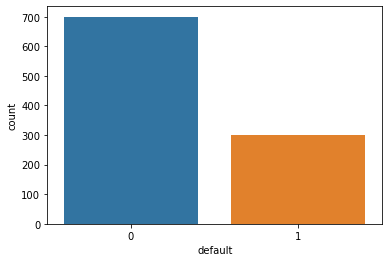

In [8]:
#verificando distribuição de dados da amostra
print(dados.default.value_counts())
ax = sns.countplot(x='default', data=dados)

<b><i>Aqui notamos que os dados da variável 'default' estão desbalanceados.</b></i>

<AxesSubplot:xlabel='idade'>

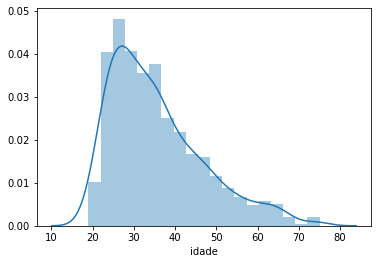

In [9]:
sns.distplot(dados['idade'],kde=True)

<AxesSubplot:xlabel='valor_emprestimo'>

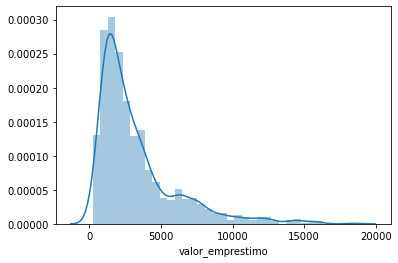

In [10]:
sns.distplot(dados['valor_emprestimo'],kde=True)

<b><i>Nos dois gráficos acima, notamos assimetria a direita. Logo precisamos fazer uma normalização nos dados para que o nosos algoritmo tenha acurácia para valores de emprestimo mais algos e idades mais altas.</b></i>

[(0, 'sexo_est_civil'), (1, 'prazo_emprestimo_meses')]


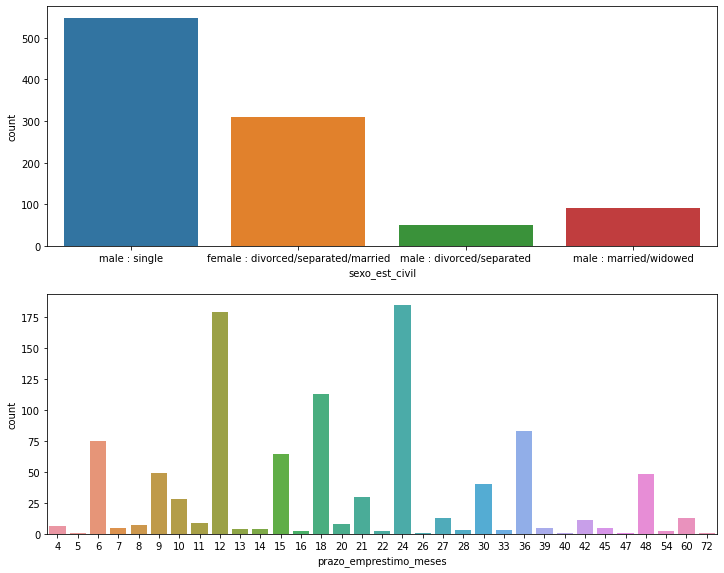

In [11]:
histogramas = ['sexo_est_civil','prazo_emprestimo_meses']
lista_histogramas = list(enumerate(histogramas))
print(lista_histogramas)
plt.figure(figsize=(12,15))
for i in lista_histogramas:
#     subplot(nrows, ncols, index, **kwargs)
    plt.subplot(3,1,i[0]+1)
    sns.countplot(x=i[1], data=dados)

In [12]:
#as variáveis quantitativas podemos analisar estatisticamente
selecao = ['valor_emprestimo','prazo_emprestimo_meses','tempo_emprego_atual','idade']
dados[selecao].describe()

,valor_emprestimo,prazo_emprestimo_meses,idade
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,20.903000,35.546000
std,2822.736876,12.058814,11.375469
min,250.000000,4.000000,19.000000
25%,1365.500000,12.000000,27.000000
50%,2319.500000,18.000000,33.000000
75%,3972.250000,24.000000,42.000000
max,18424.000000,72.000000,75.000000


<AxesSubplot:xlabel='sexo_est_civil', ylabel='idade'>

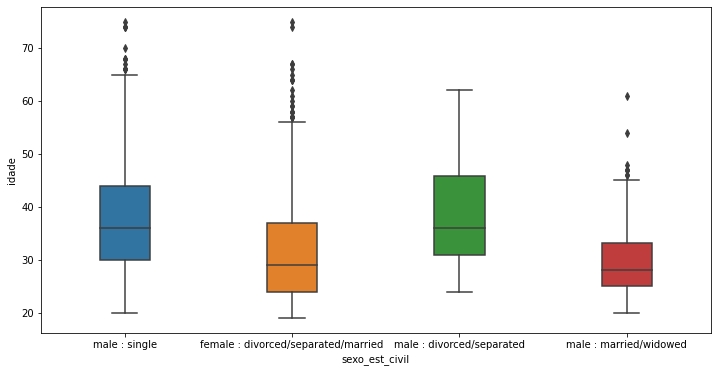

In [13]:
# dados['sexo'] = (dados[dados['sexo_est_civil==1']]) 
plt.figure(figsize=(12,6))
sns.boxplot(x=dados['sexo_est_civil'],y=dados['idade'],orient='v',width=0.3)

In [14]:
pd.set_option('display.max_columns',21)
dados.head(3)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


#### Tipos de variáveis no dataset
    Quantitativas: 'prazo_emprestimo_meses', 'valor_emprestimo', 'taxa_comp_salario','anos_residencia_atual',
    'idade','n_creditos_banco','n_dependentes'
    
    Qualitativas:  'default', 'conta_corrente', 'historico_credito', 'proposito_emprestimo','reserva_cc',
    'tempo_emprego_atual', 'sexo_est_civil', 'outros_fiadores','propriedade','outros_planos_financiamento',
    'tipo_residencia','status_emprego','telefone', 'trabalhador_estrangeiro'


# Modificando variáveis no dataset

In [15]:
#transformando os valores de string para numéricos para podermos aplicar a regressão logistica.
renomear_cc = {'no checking account':1,
               '< 0 DM':2,
               '0 <= ... < 200 DM':3,
               '>= 200 DM / salary assignments for at least 1 year':4}

renomear_prop_empr ={'domestic appliances':1, '(vacation - does not exist?)':2,
       'radio/television':3, 'car (new)':4, 'car (used)':5, 'business':6,
       'repairs':7, 'education':8, 'furniture/equipment':9, 'retraining':10}

renomear_hist_cred = {'critical account/ other credits existing (not at this bank)':1,
       'existing credits paid back duly till now':2,
       'delay in paying off in the past':3,
       'no credits taken/ all credits paid back duly':4,
       'all credits at this bank paid back duly':5}

renomear_reserva_cc = {'unknown/ no savings account':1, '... < 100 DM':2,
       '500 <= ... < 1000 DM ':3, '.. >= 1000 DM ':4, '100 <= ... < 500 DM':5}

renomear_temp_emp_atual = {'.. >= 7 years':1, '1 <= ... < 4 years':2, '4 <= ... < 7 years':3,
       'unemployed':4, '... < 1 year ':5}

renomear_sexo={'male : single':1, 'female : divorced/separated/married':2,
       'male : divorced/separated':3, 'male : married/widowed':4}

renomear_prop = {'real estate':1,
       'if not A121 : building society savings agreement/ life insurance':2,
       'unknown / no property':3,
       'if not A121/A122 : car or other, not in attribute 6':4}

renomear_plan_fin = {'none':1, 'bank':2, 'stores':3}

renomear_tip_res = {'own':1, 'for free':2, 'rent':3}

renomear_stat_empr ={'skilled employee / official':1, 'unskilled - resident':2,
       'management/ self-employed/ highly qualified employee/ officer':3,
       'unemployed/ unskilled - non-resident':4}

renomear_telefone = {'yes, registered under the customers name ':1, 'none':2}

renomear_sim_nao = {'yes':1, 'no':0}

renomear_outros_fiadores = {'none':1, 'guarantor':2, 'co-applicant':3}


dados['conta_corrente'] = dados['conta_corrente'].map(renomear_cc)
dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(renomear_prop_empr)
dados['historico_credito'] = dados['historico_credito'].map(renomear_hist_cred)
dados['reserva_cc'] = dados['reserva_cc'].map(renomear_reserva_cc)
dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map(renomear_temp_emp_atual)
dados['sexo_est_civil'] = dados['sexo_est_civil'].map(renomear_sexo)
dados['propriedade'] = dados['propriedade'].map(renomear_prop)
dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map(renomear_plan_fin)
dados['tipo_residencia'] = dados['tipo_residencia'].map(renomear_tip_res)
dados['status_emprego'] = dados['status_emprego'].map(renomear_stat_empr)
dados['telefone'] = dados['telefone'].map(renomear_telefone)
dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map(renomear_sim_nao)
dados['outros_fiadores'] = dados['outros_fiadores'].map(renomear_outros_fiadores)

In [16]:
### Reorganizando colunas que possuem valores diferentes que representam a mesma classe

#male = 1,3,4
#female=2

#mulher=1
#homem=0

dic_sex = {1:0,3:0,4:0,2:1}
dic_est_civil = {3:1,5:1,1:0,2:0,4:0}
dados['sexo']=dados['sexo_est_civil'].map(dic_sex)
dados['estado_civil']=dados['sexo_est_civil'].map(dic_est_civil)
dados.head(3)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,2,6,1,1,1169,1,1,4,1,...,67,1,1,2,1,1,1,1,0,0
1,1,3,48,2,1,5951,2,2,2,2,...,22,1,1,1,1,1,2,1,1,0
2,0,1,12,1,2,2096,2,3,2,1,...,49,1,1,1,2,2,2,1,0,0


In [17]:
# variavel idade precisa representar um grupo e não uma idade especifica

## faixas de valores:
# 18-30 = 1
# 31-40 = 2
# 41-50 = 3
# 51-60 = 3
# 61-70 = 5
# 71-80=6

bins = [18,30,40,60,70,80]
labels=[1,2,3,4,5]
dados['faixa_idade'] = pd.cut(dados['idade'],bins=bins,labels=labels)

In [18]:
# transformando 'faixa_prazo_emprestimo' para variavel 'prazo_emprestimo_meses'

## faixas de valores:
# 01 - 12 = 1 
# 13 - 24 = 2
# 26 - 36 = 3
# 37 - 48 = 4
# 49 - 60 = 5
# 61 - 72 = 6

bins = [1,12,24,36,48,60,72]
labels=[1,2,3,4,5,6]
dados['faixa_prazo_emprestimo'] = pd.cut(dados['prazo_emprestimo_meses'],bins=bins,labels=labels)

In [19]:
# variavel valor_emprestimo precisa ter um range para não precisar ser tão especifica

##faixas de valores:
# 1 - 1000 = 1
# 1000 - 2000 = 2
# 2000 - 3000 = 3
# ..
# ..
# 19000 - 20000 = 20

bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
dados['faixa_valor_emprestimo'] = pd.cut(x = dados['valor_emprestimo'],bins=bins,labels=labels)

In [20]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,2,6,1,1,1169,1,1,4,1,...,2,1,1,1,1,0,0,4,1,2
1,1,3,48,2,1,5951,2,2,2,2,...,1,1,1,2,1,1,0,1,4,6
2,0,1,12,1,2,2096,2,3,2,1,...,1,2,2,2,1,0,0,3,1,3
3,0,2,42,2,3,7882,2,3,2,1,...,1,1,2,2,1,0,0,3,4,8
4,1,2,24,3,4,4870,2,2,3,1,...,2,1,2,2,1,0,0,3,2,5


<b><i>Vale lembrar que o Banco Central possui regras que regulamentariam o sistema de credit score no Brasil. Uma dessas regras diz que não podemos inserir dados sensíveis como "sexo" e "estado civil", logo, vamos retirar essas colunas da base de dados.</b></i>

In [21]:
# agora vamos remover as variáveis que já foram transformadas
colunas_retiradas = ['sexo_est_civil','sexo','estado_civil','idade','prazo_emprestimo_meses','valor_emprestimo']
dados.drop(columns=colunas_retiradas,axis=1,inplace=True)
print(dados.shape[1])

20


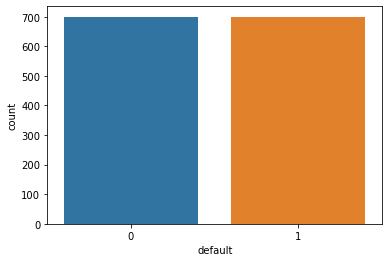

In [22]:
# Resampling na base de dados através da técnica SMOTE
X = dados.drop('default', axis = 1)
y = dados['default']
smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados
dados = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)
ax = sns.countplot(x='default', data=dados)  # plotando a variável target balanceada.

In [23]:
### Criando uma funcao para rodar modelo de Regressão Logistica de forma automatica

def run_model(base_dados,classificador):
    #separacao da base de dados
    X = dados.drop(['default'],axis=1)
    y = dados.default
    SEED=77
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED,stratify=y) 
    print('Vamos treinar o modelo com {} itens'.format(X_train.shape[0]))
    print('Vamos testar o modelo com {} itens'.format(X_test.shape[0]))
    print('\n')
    
    #treinando o modelo
    modelo = classificador
    modelo.fit(X_train,y_train)
    
    #testando o modelo
    y_previsto = modelo.predict(X_test)

    #analisando a acurácia do nosso modelo
    score_modelo = modelo.score(X_train,y_train)
    print('A acurácia do modelo em treino é {}%'.format(score_modelo.round(4)*100))

    #a acurácia do predict
    acuracia = accuracy_score(y_test,y_previsto)
    print('A acurácia do modelo em teste é {}%'.format(acuracia.round(4)*100))
    print('\n')
    
    
    #imprimindo matriz de confusao
    matriz_confusao = plot_confusion_matrix(modelo,X_test,y_test,cmap='Blues',values_format='.3g')
    plt.title('Matriz de Confusão')
    plt.show()
    print('\n')
    
    #metricas manuais
    print('Precision Score: {}'.format(precision_score(y_test,y_previsto).round(3)*100))
    print('Recall: {}'.format(recall_score(y_test,y_previsto).round(3)*100))
    print('f1 Score: {} '.format(f1_score(y_test,y_previsto).round(3)*100))
    print('\n')
    
#     #imprimir matrix_confusao
#     print('A matriz de confusão é:')
#     print(confusion_matrix(y_test,y_previsto))
    
    #classification report
    print(classification_report(y_test,y_previsto))
    
    #curva ROC e area AUC
    prob_previsao = modelo.predict_proba(X_test)[:, 1]
    #tfp = taxa de falso positvos
    #tvp = taxa de verdadeiros positivos
    tfp, tvp, limite = roc_curve(y_test, prob_previsao)

    #analise da área ROC-AUC
    print('A área sobre a curva ROC(roc_auc) é {}'.format(roc_auc_score(y_test,prob_previsao).round(4)))

    #plotando a curva ROC
    roc_auc = roc_auc_score(y_test,prob_previsao)
    plt.subplots(1,figsize=(5,5))
    plt.title('Curva ROC do modelo')
    plt.plot(tfp,tvp,'b',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([0, 0], [0, 1],'g--')
    plt.plot([0, 1], [1, 1],'g--')
    plt.title('Curva ROC do modelo')
    plt.show()
    
    return modelo,matriz_confusao,X_train,X_test,y_train,y_test

Vamos treinar o modelo com 980 itens
Vamos testar o modelo com 420 itens


A acurácia do modelo em treino é 66.02%
A acurácia do modelo em teste é 65.0%




C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


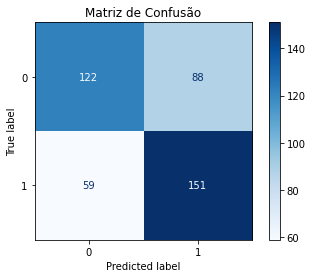



Precision Score: 63.2
Recall: 71.89999999999999
f1 Score: 67.30000000000001 


              precision    recall  f1-score   support

           0       0.67      0.58      0.62       210
           1       0.63      0.72      0.67       210

    accuracy                           0.65       420
   macro avg       0.65      0.65      0.65       420
weighted avg       0.65      0.65      0.65       420

A área sobre a curva ROC(roc_auc) é 0.6914


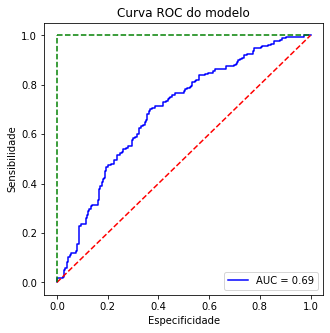

In [24]:
modelo,matriz_confusao,X_train,X_test,y_train,y_test = run_model(dados,LogisticRegression(max_iter=100))

<b><i>Nessa análise levei em conta dois cenários: i - sem utilizar balanceamento dos dados e ii-com balanceamento através de over-sampling.</b></i>

##### cenário i
* Precision Score: 46.400000000000006
* Recall: 28.9
* f1 Score: 35.6 
        [[180  30]
         [ 64  26]]

##### cenário ii   
* Precision Score: 63.2
* Recall: 71.89999999999999
* f1 Score: 67.30000000000001 
        [[122  88]
         [ 59 151]]
         
<b><i>A partir desse cenário notamos, através da matriz de confusão que o cenário ii foi melhor pois foi capaz de prever tanto os VP e VN, diferentemente do cenário i que era bom somente em prever a variável negativa (0) para não conceder empréstimos.</b></i>

# Otimização do modelo 

<b><i>Aqui vamos utiliar a validação cruzada para otimizar o modelo e melhorarmos ainda mais a métrica "precision" e também a curva roc_auc</b></i>

In [25]:
cv_kfold = KFold(n_splits=5,shuffle=True) #shuffle implementa aleatório

In [26]:
desempenho_cross_val_roc_auc = cross_val_score(estimator = modelo,
                                         X=X_train,
                                         y=y_train,
                                         scoring = 'roc_auc',
                                         cv=cv_kfold,
                                         )

print('Desempenho médio de precision_score: {}'.format(desempenho_cross_val_roc_auc.mean().mean().round(3)*100))


Desempenho médio de precision_score: 67.9


In [27]:
parametros_random_search = {'max_iter':[1000,1500,200]}

In [40]:
random_cv = RandomizedSearchCV(modelo,
                                 parametros_random_search,
                                 n_iter=5,
                                 cv=cv_kfold,
                                 scoring='roc_auc',#métrica de análise
                                random_state=77,
                                 n_jobs=-1 #-1 auxilia para consumir menos processamento 
                                 ) 

In [41]:
randomcv = random_cv.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [42]:
# parametros do melhor modelo
randomcv.best_params_

{'max_iter': 1000}

In [43]:
# o melhor score para roc_auc
randomcv.best_score_

0.6840485690944774

Vamos treinar o modelo com 980 itens
Vamos testar o modelo com 420 itens


A acurácia do modelo em treino é 66.02%
A acurácia do modelo em teste é 65.0%




C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


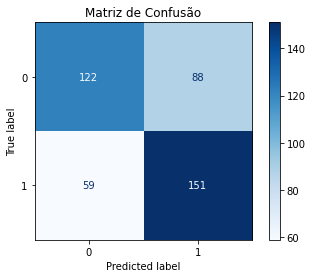



Precision Score: 63.2
Recall: 71.89999999999999
f1 Score: 67.30000000000001 


              precision    recall  f1-score   support

           0       0.67      0.58      0.62       210
           1       0.63      0.72      0.67       210

    accuracy                           0.65       420
   macro avg       0.65      0.65      0.65       420
weighted avg       0.65      0.65      0.65       420

A área sobre a curva ROC(roc_auc) é 0.6914


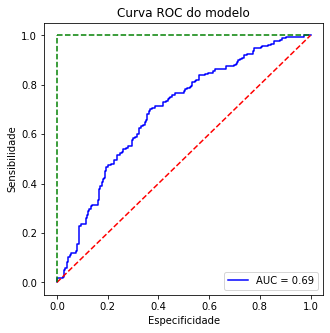

In [44]:
# treinando o melhor modelo com o melhor número de interações encontrado no RandomizedSearch
modelo_otimizado,matriz_confusao,X_train,X_test,y_train,y_test = run_model(dados,LogisticRegression(max_iter=1000))

In [51]:
parametros_grid_search = {'max_iter':[1000,1500,200]}
grid_search = GridSearchCV(estimator=modelo_otimizado,
                 param_grid=parametros_grid_search, 
                 cv=cv_kfold,
                 scoring='roc_auc',#métrica de análise
                 n_jobs=-1 #-1 auxilia para consumir menos processamento
                )

In [53]:
gridsearch = grid_search.fit(X_train,y_train)

In [56]:
gridsearch.best_score_

0.6761294597164114

In [58]:
gridsearch.best_estimator_

LogisticRegression(max_iter=1000)

# Exportando o melhor modelo

In [33]:
output = open('modelo_credit_scoring','wb')
pickle.dump(modelo_otimizado,output)
output.close()